# COVID-19 Cases Data Vizualisation Notebook
------------------

In [96]:
#conda install -c plotly plotly-orca

### Importing Libraries

In [97]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import seaborn as sns
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [98]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [99]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [100]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [101]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


#### Check the shape of the dataframes

In [102]:
confirmed_df.shape

(269, 308)

In [103]:
recoveries_df.shape

(256, 308)

In [104]:
deaths_df.shape

(269, 308)

### Delete the useless columns

In [105]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
1,Albania,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
2,Algeria,0,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
3,Andorra,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
4,Angola,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [106]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
1,Albania,0,0,0,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
2,Algeria,0,0,0,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
3,Andorra,0,0,0,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
4,Angola,0,0,0,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [107]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
1,Albania,0,0,0,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
2,Algeria,0,0,0,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
4,Angola,0,0,0,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


### Aggregate rows by Country

In [108]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
Albania,0,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
Algeria,0,0,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
Andorra,0,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
Angola,0,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [109]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
Albania,0,0,0,0,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
Algeria,0,0,0,0,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
Andorra,0,0,0,0,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
Angola,0,0,0,0,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [110]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
Albania,0,0,0,0,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
Algeria,0,0,0,0,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
Andorra,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
Angola,0,0,0,0,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


#### Check the shape of the new dataframes

In [111]:
confirmed_df_aggregated.shape

(191, 304)

In [112]:
recoveries_df_aggregated.shape

(191, 304)

In [113]:
deaths_df_aggregated.shape

(191, 304)

### Visualizing Europe confirmed cases

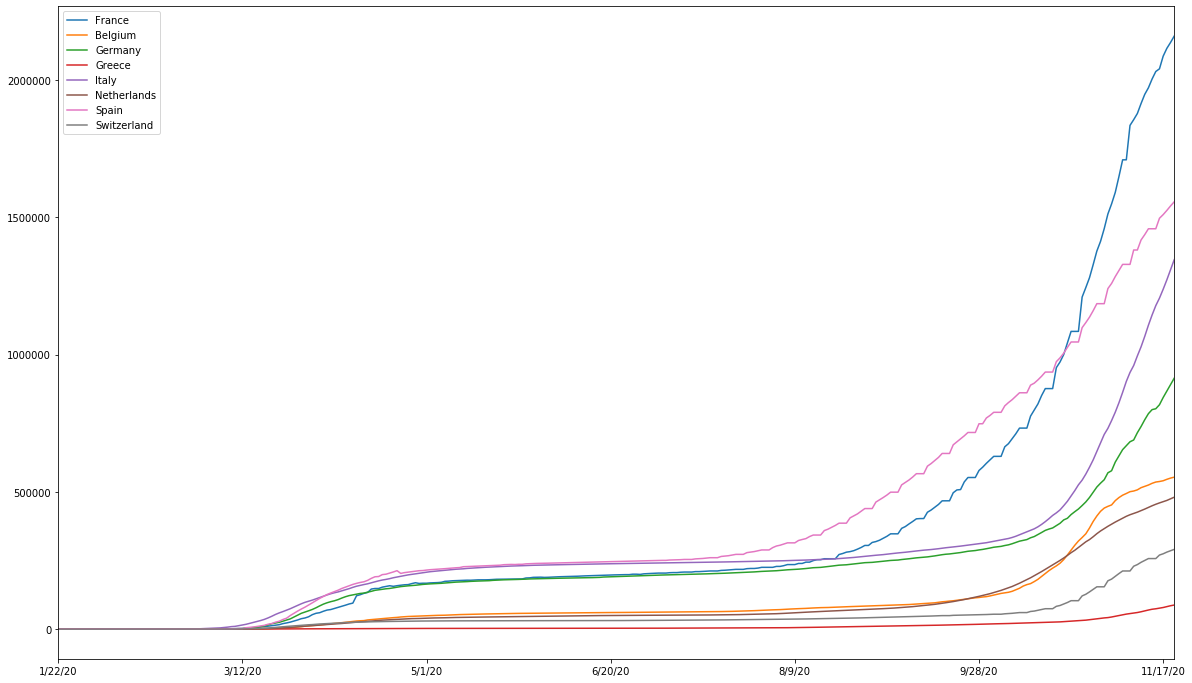

In [114]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/confirmed-europe.png")
plt.show()

### Visualizing Europe recoveries cases

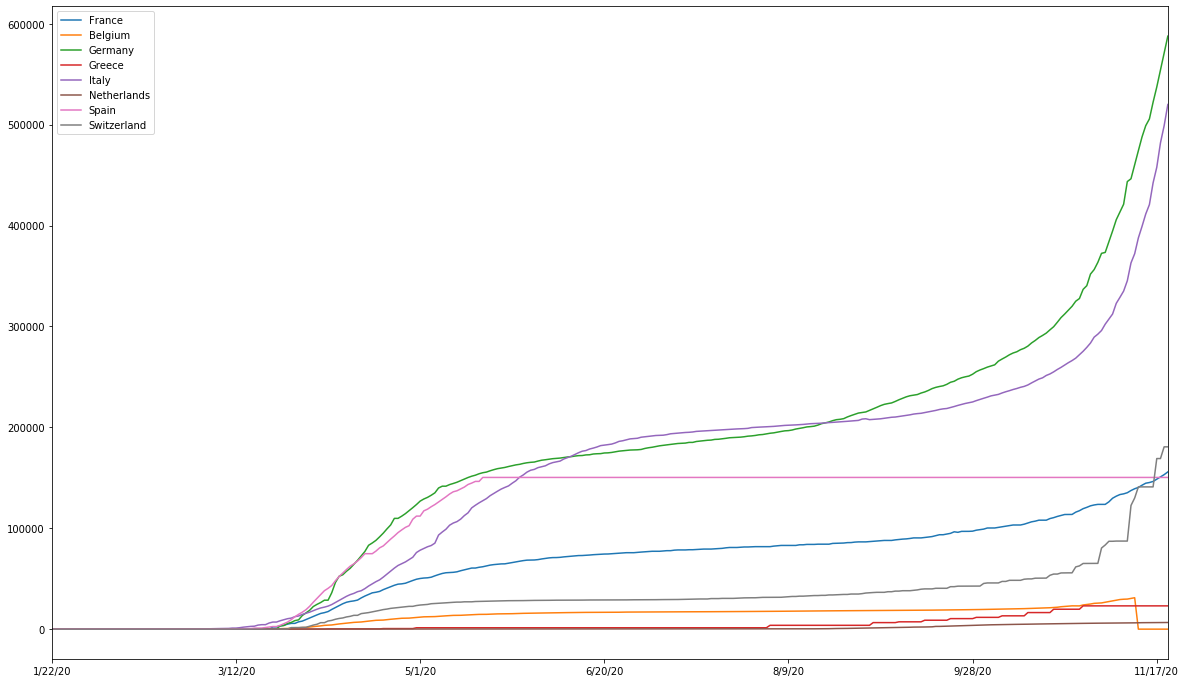

In [115]:
recoveries_df_aggregated.loc ["France"].plot()
recoveries_df_aggregated.loc ["Belgium"].plot()
recoveries_df_aggregated.loc ["Germany"].plot()
recoveries_df_aggregated.loc ["Greece"].plot()
recoveries_df_aggregated.loc ["Italy"].plot()
recoveries_df_aggregated.loc ["Netherlands"].plot()
recoveries_df_aggregated.loc ["Spain"].plot()
recoveries_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/recoveries-europe.png")
plt.show()

### Visualizing Europe deaths cases

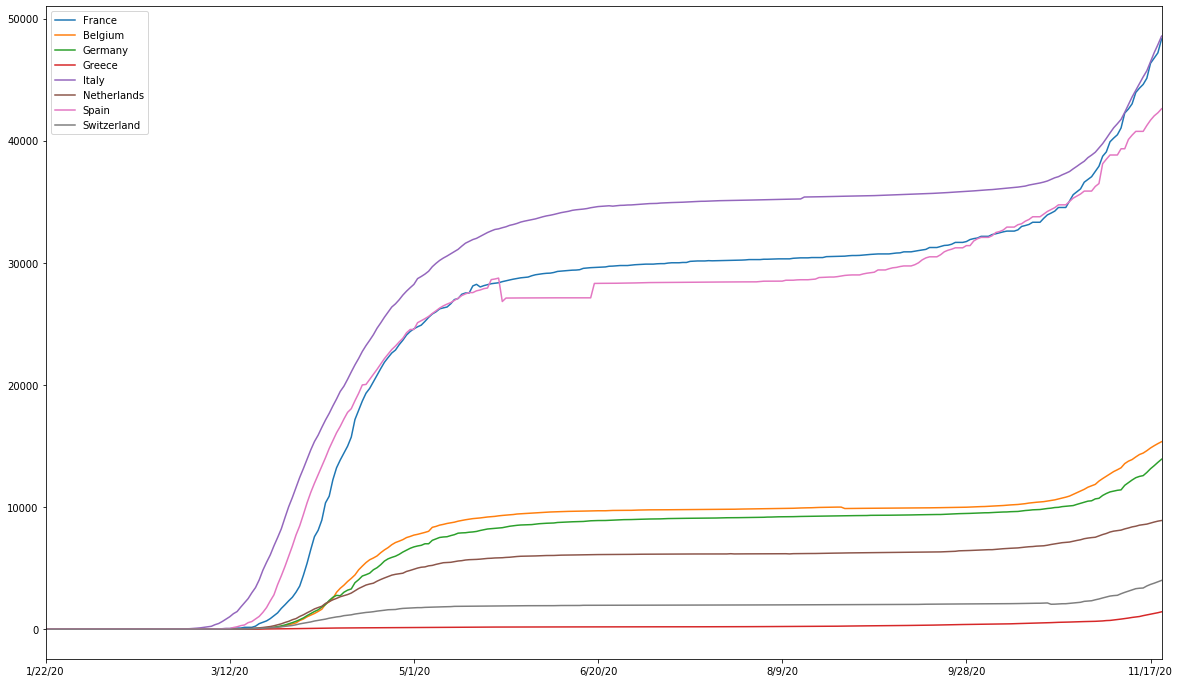

In [116]:
deaths_df_aggregated.loc ["France"].plot()
deaths_df_aggregated.loc ["Belgium"].plot()
deaths_df_aggregated.loc ["Germany"].plot()
deaths_df_aggregated.loc ["Greece"].plot()
deaths_df_aggregated.loc ["Italy"].plot()
deaths_df_aggregated.loc ["Netherlands"].plot()
deaths_df_aggregated.loc ["Spain"].plot()
deaths_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/deaths-europe.png")
plt.show()

### Visualizing Asia confirmed cases 

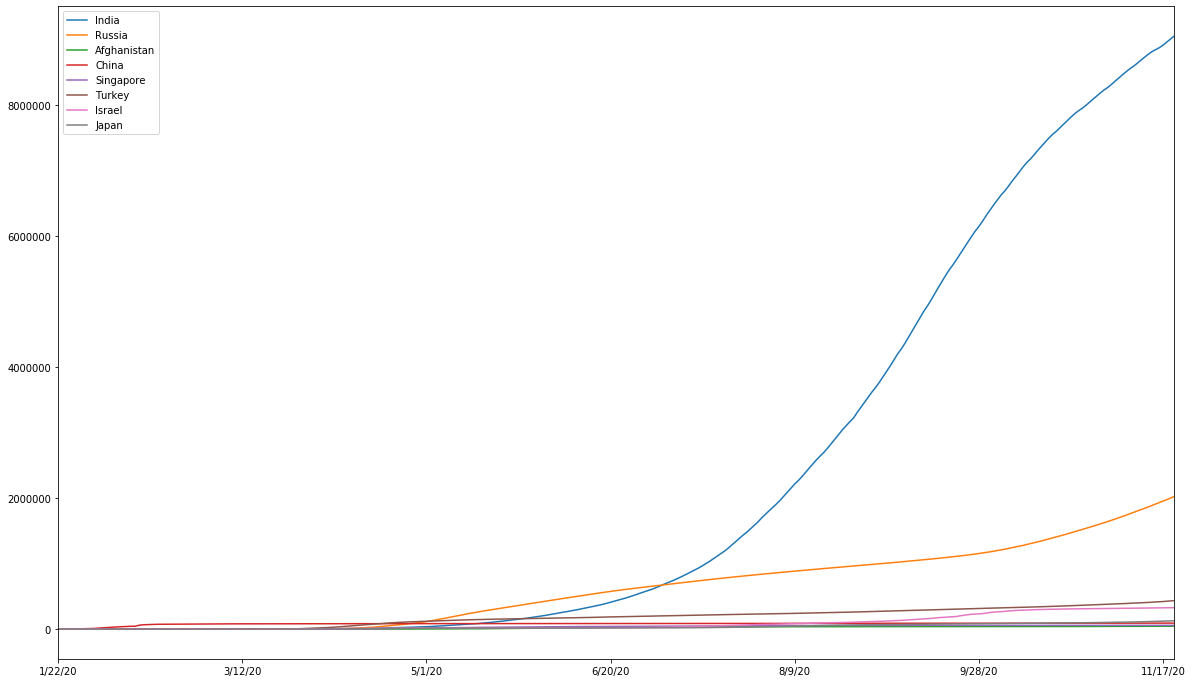

In [117]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["India"].plot()
confirmed_df_aggregated.loc ["Russia"].plot()
confirmed_df_aggregated.loc ["Afghanistan"].plot()
confirmed_df_aggregated.loc ["China"].plot()
confirmed_df_aggregated.loc ["Singapore"].plot()
confirmed_df_aggregated.loc ["Turkey"].plot()
confirmed_df_aggregated.loc ["Israel"].plot()
confirmed_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/confirmed-asia.png')
plt.show()

### Visualizing Asia recoveries cases

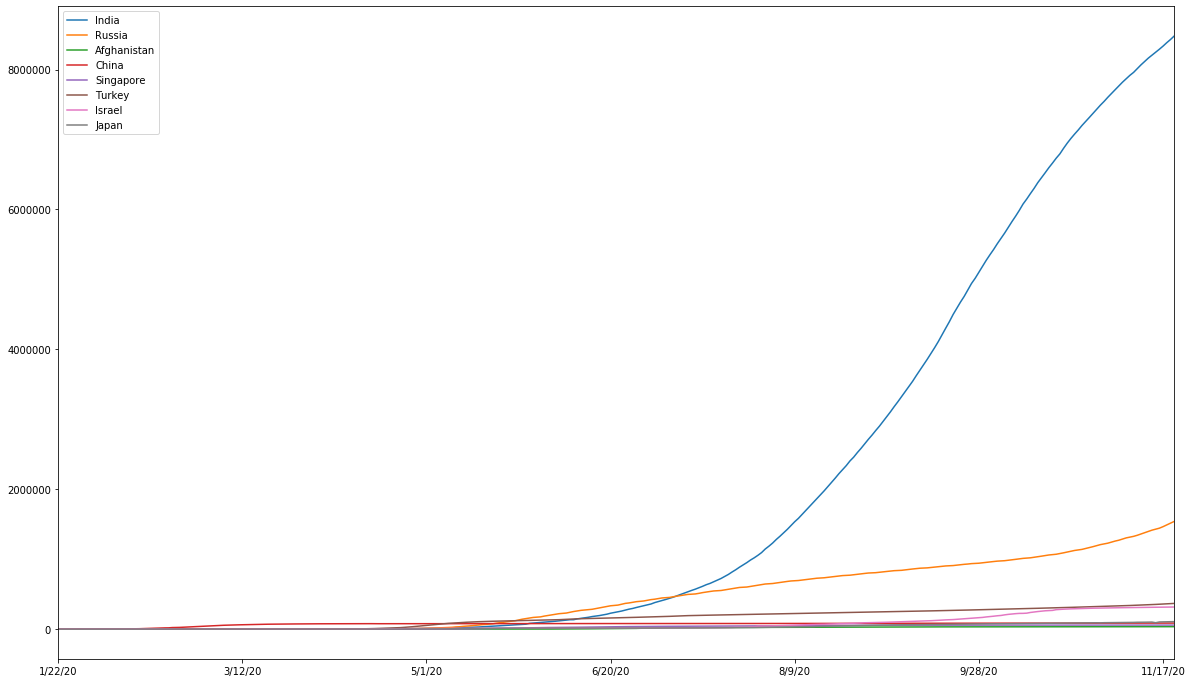

In [118]:
recoveries_df_aggregated.loc ["India"].plot()
recoveries_df_aggregated.loc ["Russia"].plot()
recoveries_df_aggregated.loc ["Afghanistan"].plot()
recoveries_df_aggregated.loc ["China"].plot()
recoveries_df_aggregated.loc ["Singapore"].plot()
recoveries_df_aggregated.loc ["Turkey"].plot()
recoveries_df_aggregated.loc ["Israel"].plot()
recoveries_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/recoveries-asia.png')
plt.show()

### Visualizing Asia deaths cases

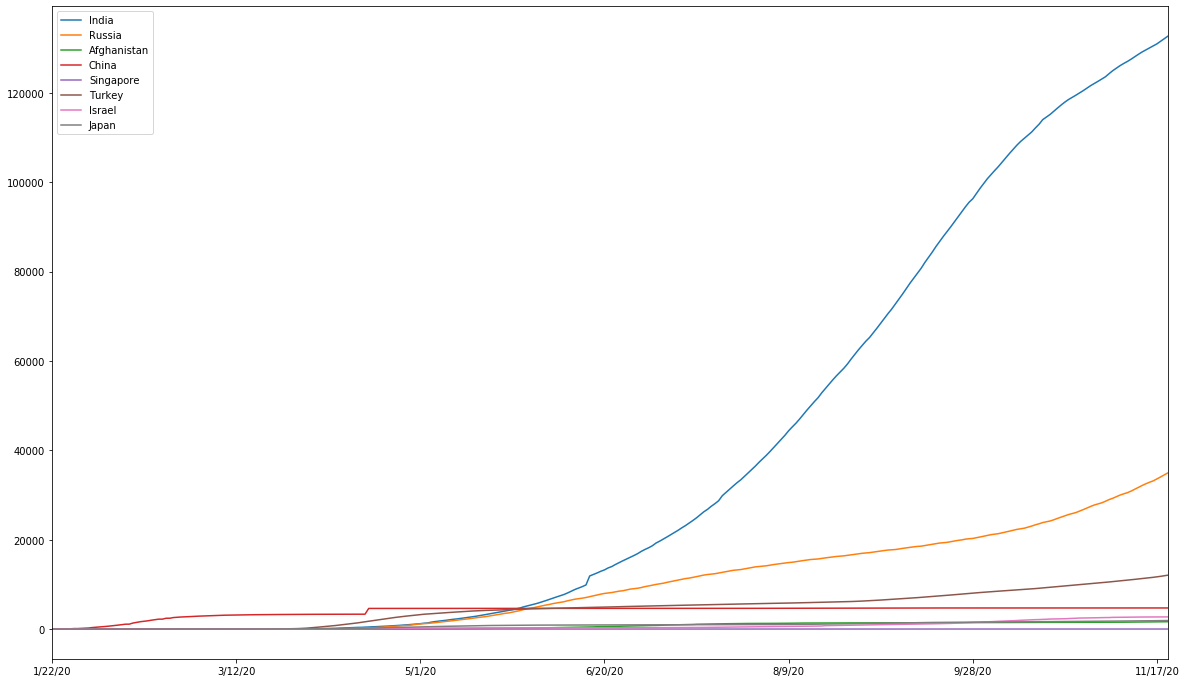

In [119]:
deaths_df_aggregated.loc ["India"].plot()
deaths_df_aggregated.loc ["Russia"].plot()
deaths_df_aggregated.loc ["Afghanistan"].plot()
deaths_df_aggregated.loc ["China"].plot()
deaths_df_aggregated.loc ["Singapore"].plot()
deaths_df_aggregated.loc ["Turkey"].plot()
deaths_df_aggregated.loc ["Israel"].plot()
deaths_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/deaths-asia.png')
plt.show()

### Visualizing Africa confirmed cases

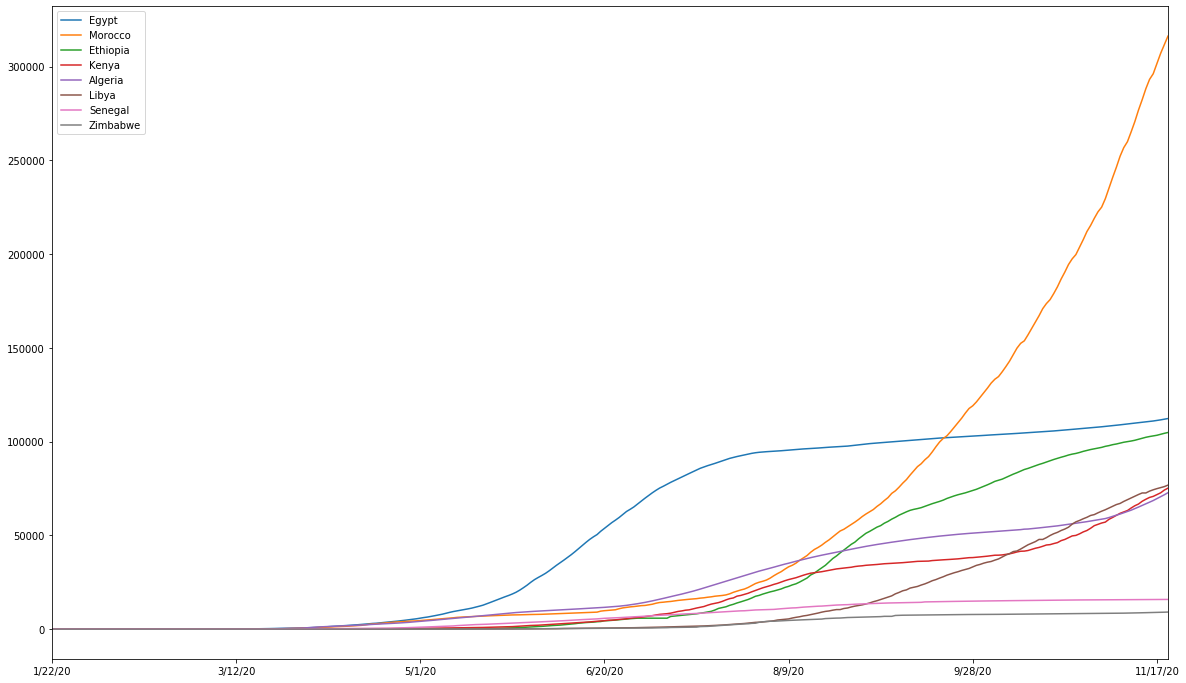

In [120]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Egypt"].plot()
confirmed_df_aggregated.loc ["Morocco"].plot()
confirmed_df_aggregated.loc ["Ethiopia"].plot()
confirmed_df_aggregated.loc ["Kenya"].plot()
confirmed_df_aggregated.loc ["Algeria"].plot()
confirmed_df_aggregated.loc ["Libya"].plot()
confirmed_df_aggregated.loc ["Senegal"].plot()
confirmed_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/confirmed-africa.png')
plt.show()

### Visualizing  Africa recoveries cases

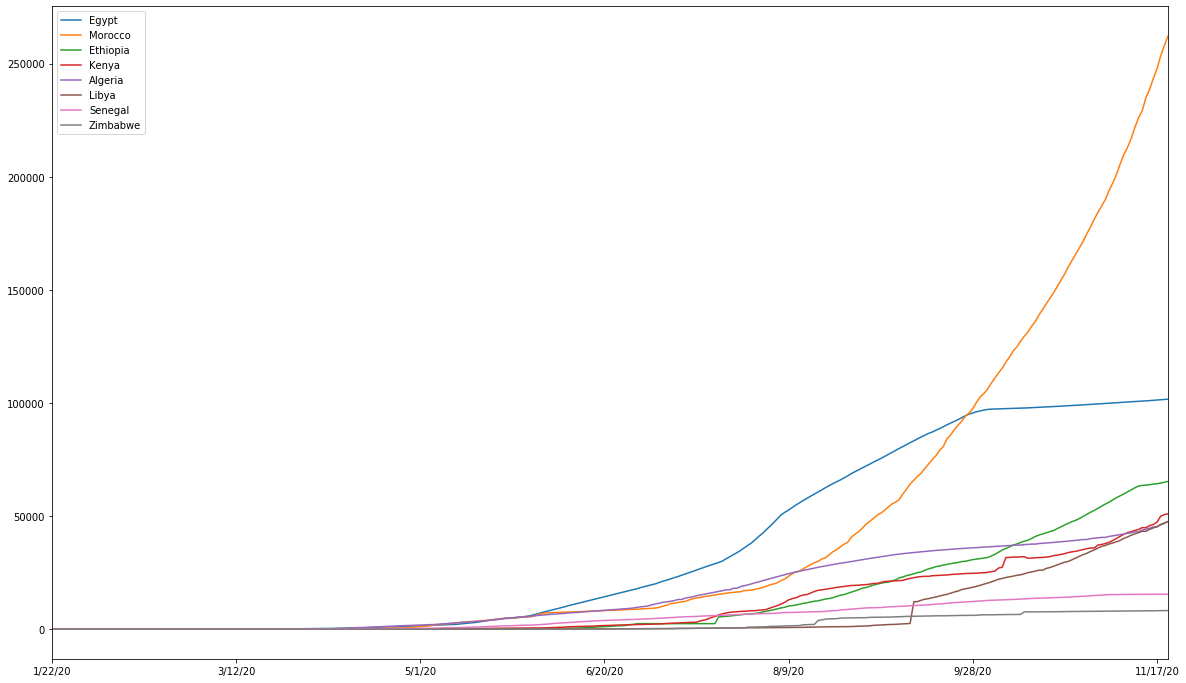

In [121]:
recoveries_df_aggregated.loc ["Egypt"].plot()
recoveries_df_aggregated.loc ["Morocco"].plot()
recoveries_df_aggregated.loc ["Ethiopia"].plot()
recoveries_df_aggregated.loc ["Kenya"].plot()
recoveries_df_aggregated.loc ["Algeria"].plot()
recoveries_df_aggregated.loc ["Libya"].plot()
recoveries_df_aggregated.loc ["Senegal"].plot()
recoveries_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/recoveries-africa.png')
plt.show()

### Visualizing Africa deaths cases

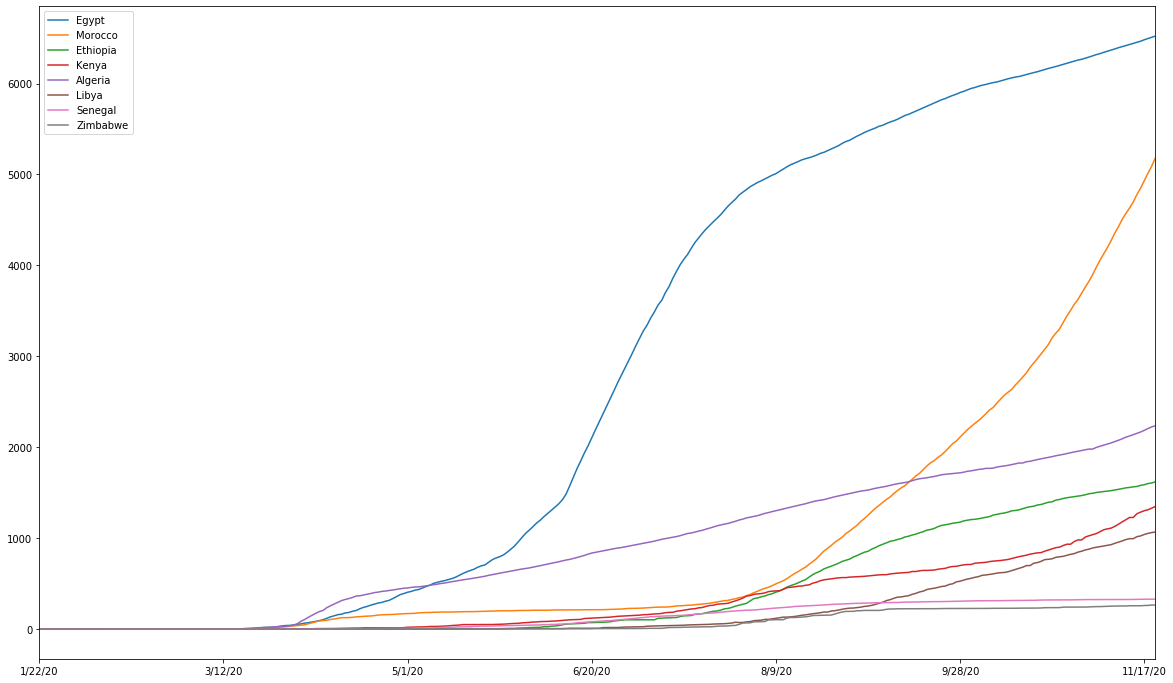

In [122]:
deaths_df_aggregated.loc ["Egypt"].plot()
deaths_df_aggregated.loc ["Morocco"].plot()
deaths_df_aggregated.loc ["Ethiopia"].plot()
deaths_df_aggregated.loc ["Kenya"].plot()
deaths_df_aggregated.loc ["Algeria"].plot()
deaths_df_aggregated.loc ["Libya"].plot()
deaths_df_aggregated.loc ["Senegal"].plot()
deaths_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/deaths-africa.png')
plt.show()

### Visualizing North America confirmed cases

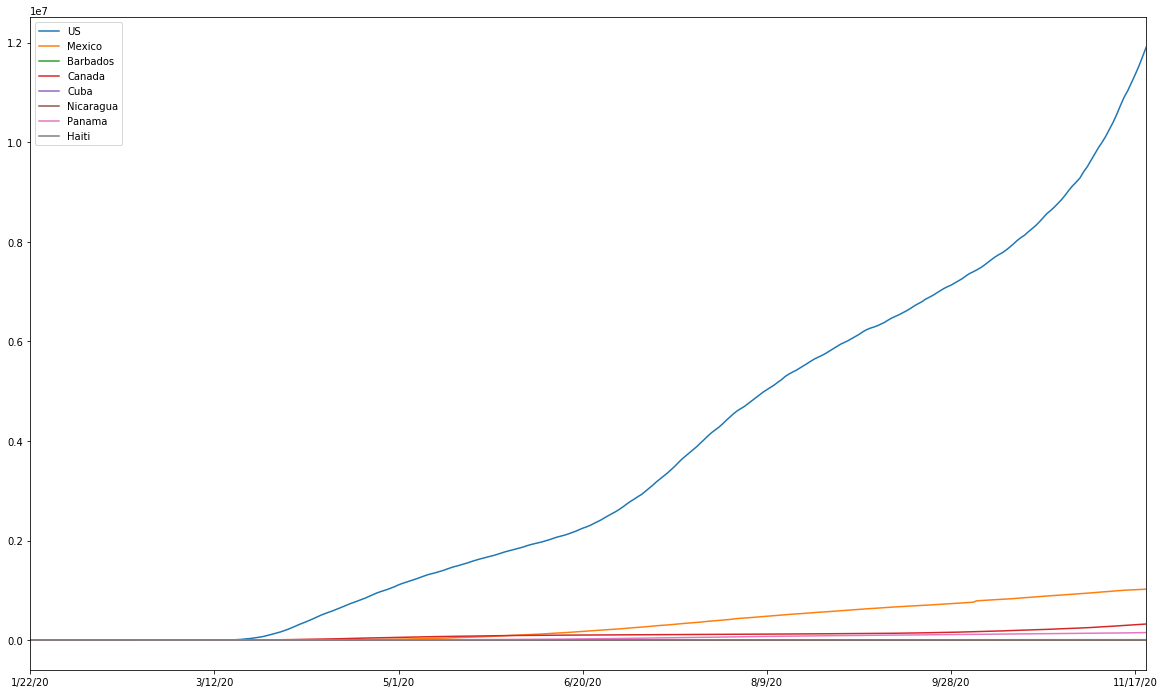

In [123]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["US"].plot()
confirmed_df_aggregated.loc ["Mexico"].plot()
confirmed_df_aggregated.loc ["Barbados"].plot()
confirmed_df_aggregated.loc ["Canada"].plot()
confirmed_df_aggregated.loc ["Cuba"].plot()
confirmed_df_aggregated.loc ["Nicaragua"].plot()
confirmed_df_aggregated.loc ["Panama"].plot()
confirmed_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/confirmed-northamerica.png')
plt.show()

### Visualizing North America recoveries cases

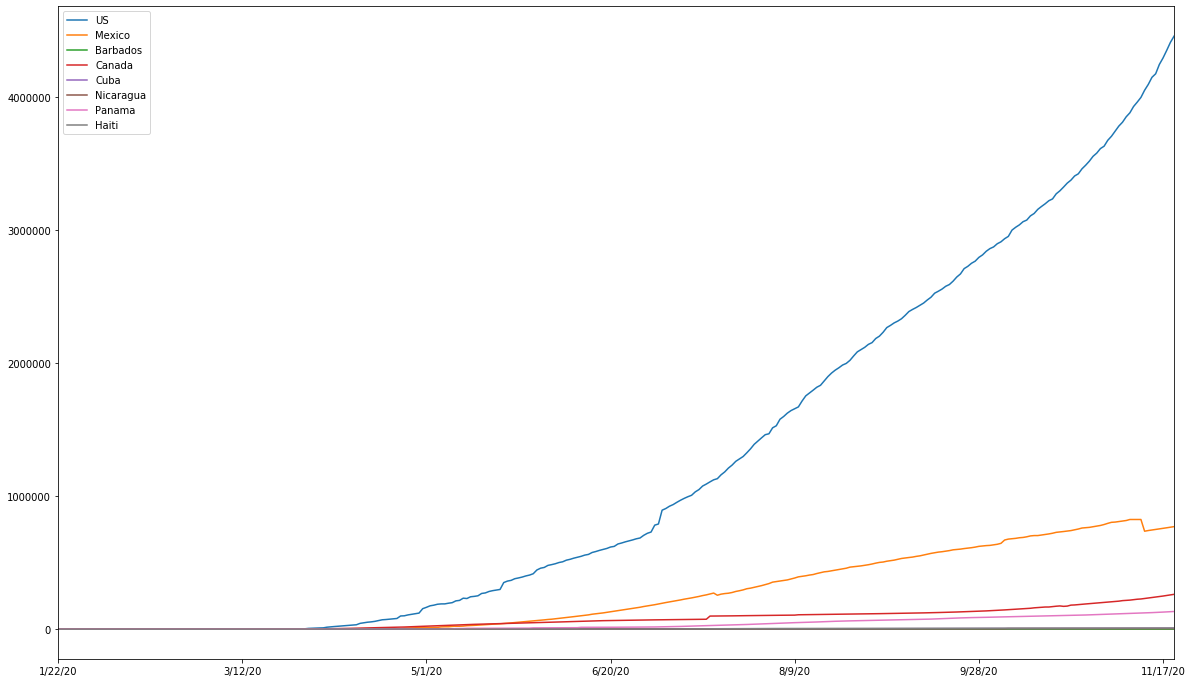

In [124]:
recoveries_df_aggregated.loc ["US"].plot()
recoveries_df_aggregated.loc ["Mexico"].plot()
recoveries_df_aggregated.loc ["Barbados"].plot()
recoveries_df_aggregated.loc ["Canada"].plot()
recoveries_df_aggregated.loc ["Cuba"].plot()
recoveries_df_aggregated.loc ["Nicaragua"].plot()
recoveries_df_aggregated.loc ["Panama"].plot()
recoveries_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/recoveries-northamerica.png')
plt.show()

### Visualizing North America deaths cases

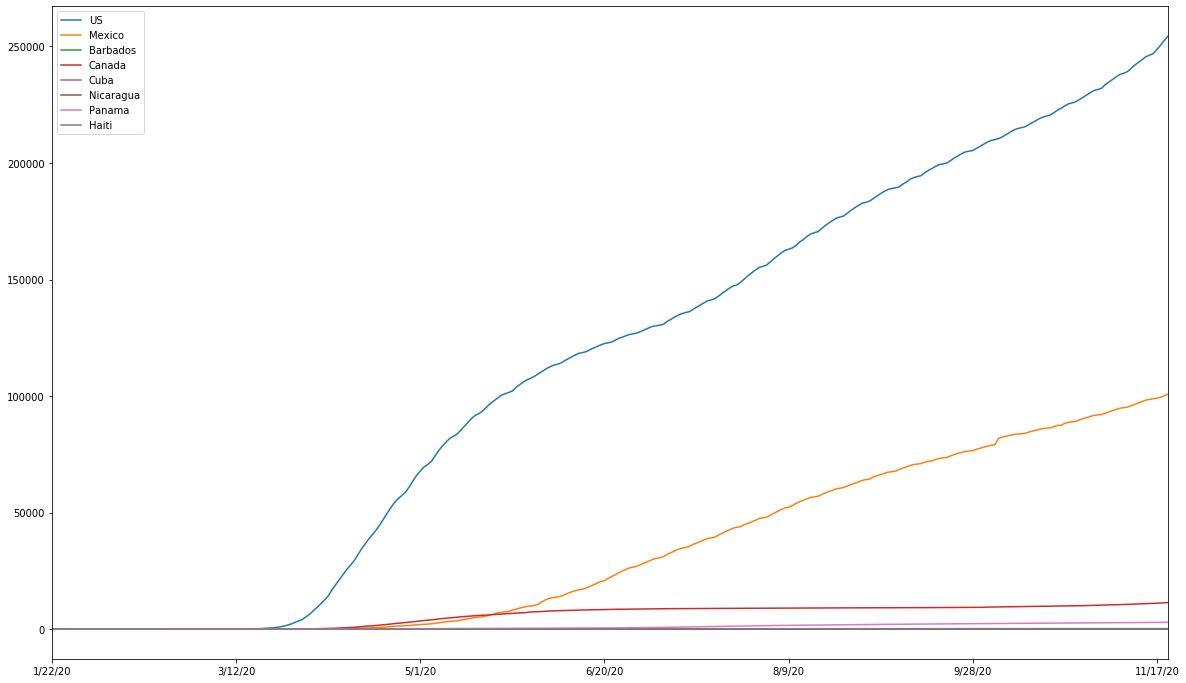

In [125]:
deaths_df_aggregated.loc ["US"].plot()
deaths_df_aggregated.loc ["Mexico"].plot()
deaths_df_aggregated.loc ["Barbados"].plot()
deaths_df_aggregated.loc ["Canada"].plot()
deaths_df_aggregated.loc ["Cuba"].plot()
deaths_df_aggregated.loc ["Nicaragua"].plot()
deaths_df_aggregated.loc ["Panama"].plot()
deaths_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/deaths-northamerica.png')
plt.show()

### Visualizing South America confirmed cases

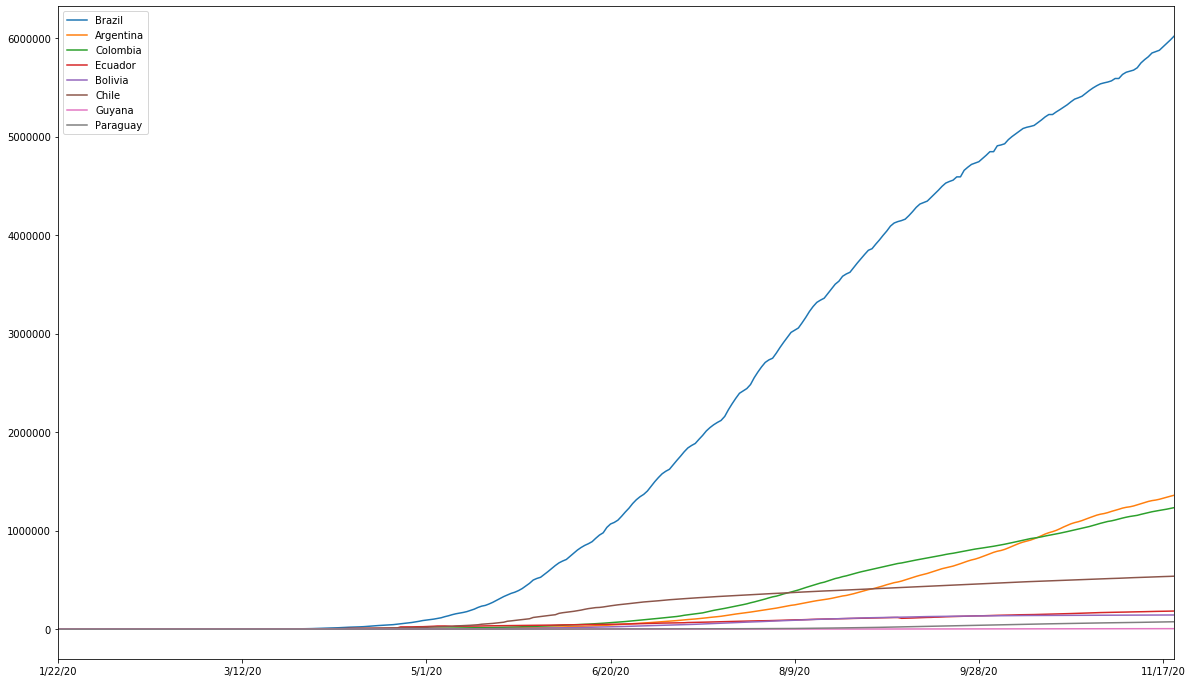

In [126]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Brazil"].plot()
confirmed_df_aggregated.loc ["Argentina"].plot()
confirmed_df_aggregated.loc ["Colombia"].plot()
confirmed_df_aggregated.loc ["Ecuador"].plot()
confirmed_df_aggregated.loc ["Bolivia"].plot()
confirmed_df_aggregated.loc ["Chile"].plot()
confirmed_df_aggregated.loc ["Guyana"].plot()
confirmed_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/confirmed-southamerica.png')
plt.show()

### Visualizing South America recoveries cases

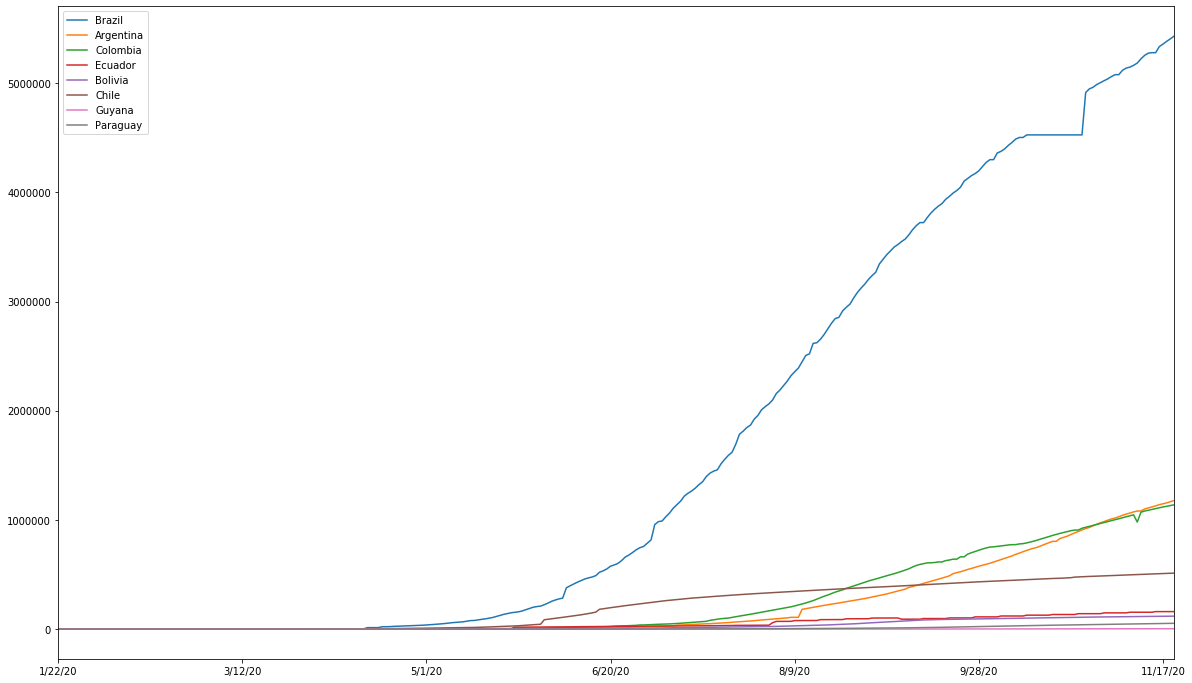

In [127]:
recoveries_df_aggregated.loc ["Brazil"].plot()
recoveries_df_aggregated.loc ["Argentina"].plot()
recoveries_df_aggregated.loc ["Colombia"].plot()
recoveries_df_aggregated.loc ["Ecuador"].plot()
recoveries_df_aggregated.loc ["Bolivia"].plot()
recoveries_df_aggregated.loc ["Chile"].plot()
recoveries_df_aggregated.loc ["Guyana"].plot()
recoveries_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/recoveries-southamerica.png')
plt.show()

### Visualizing South America deaths cases

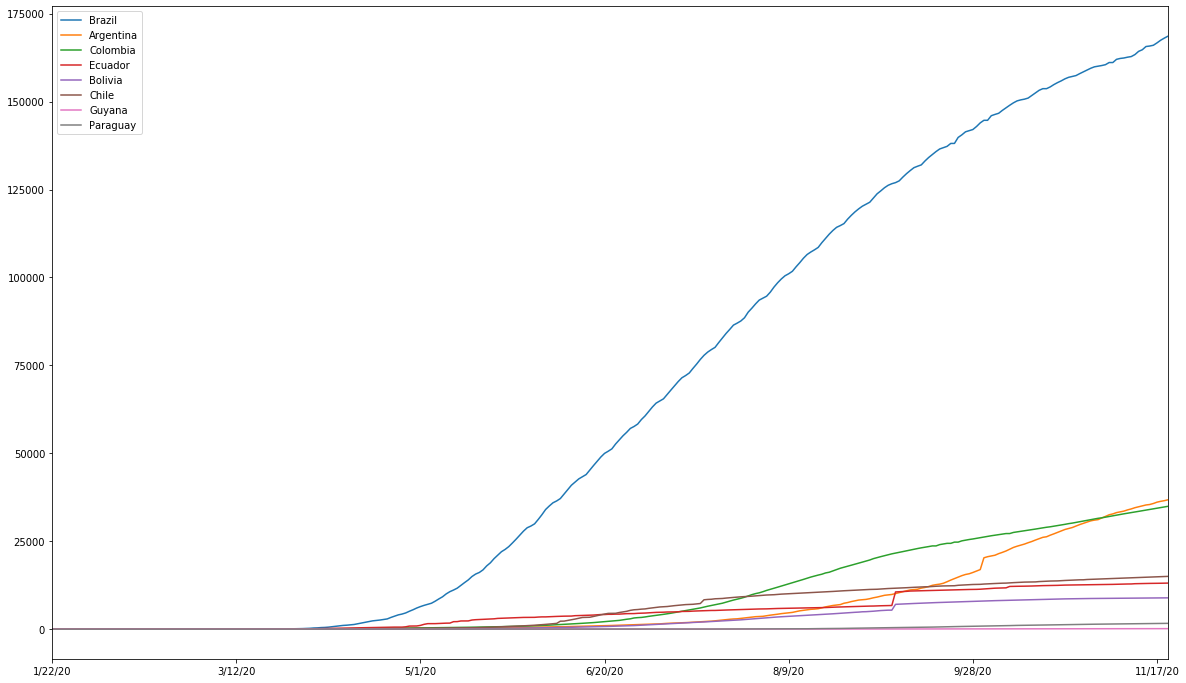

In [128]:
deaths_df_aggregated.loc ["Brazil"].plot()
deaths_df_aggregated.loc ["Argentina"].plot()
deaths_df_aggregated.loc ["Colombia"].plot()
deaths_df_aggregated.loc ["Ecuador"].plot()
deaths_df_aggregated.loc ["Bolivia"].plot()
deaths_df_aggregated.loc ["Chile"].plot()
deaths_df_aggregated.loc ["Guyana"].plot()
deaths_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/deaths-southamerica.png')
plt.show()

### Visualizing Oceania confirmed cases

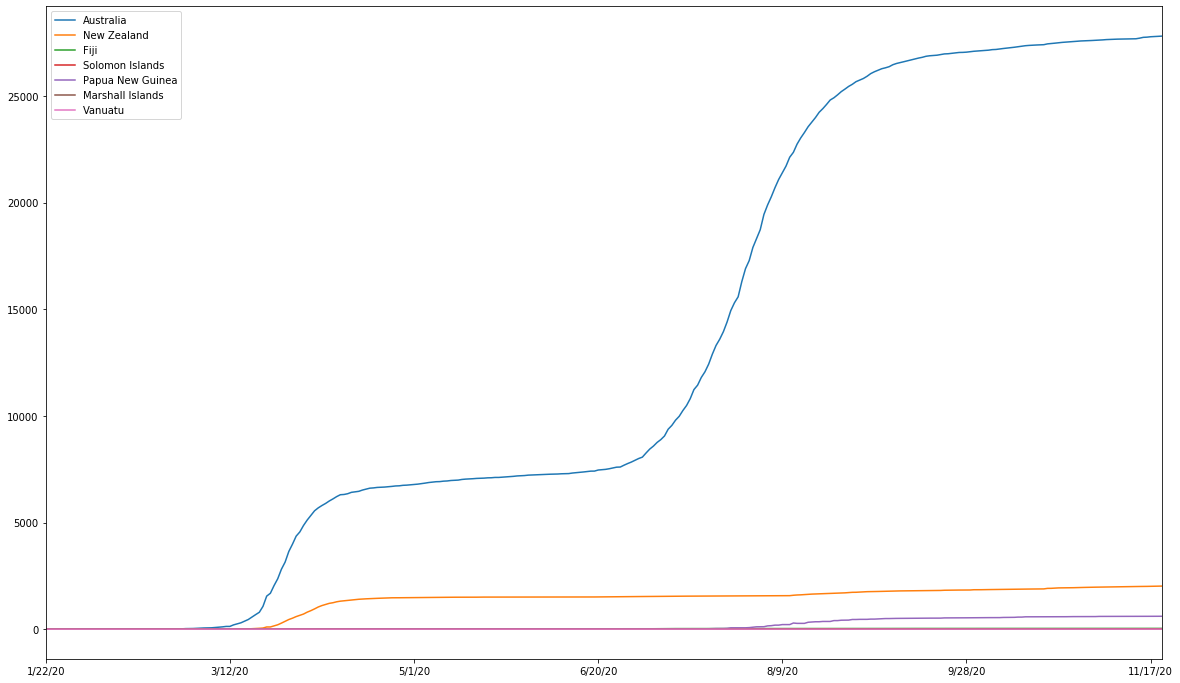

In [129]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Australia"].plot()
confirmed_df_aggregated.loc ["New Zealand"].plot()
confirmed_df_aggregated.loc ["Fiji"].plot()
confirmed_df_aggregated.loc ["Solomon Islands"].plot()
confirmed_df_aggregated.loc ["Papua New Guinea"].plot()
confirmed_df_aggregated.loc ["Marshall Islands"].plot()
confirmed_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/confirmed-oceania.png')
plt.show()

### Visualizing Oceania recoveries cases

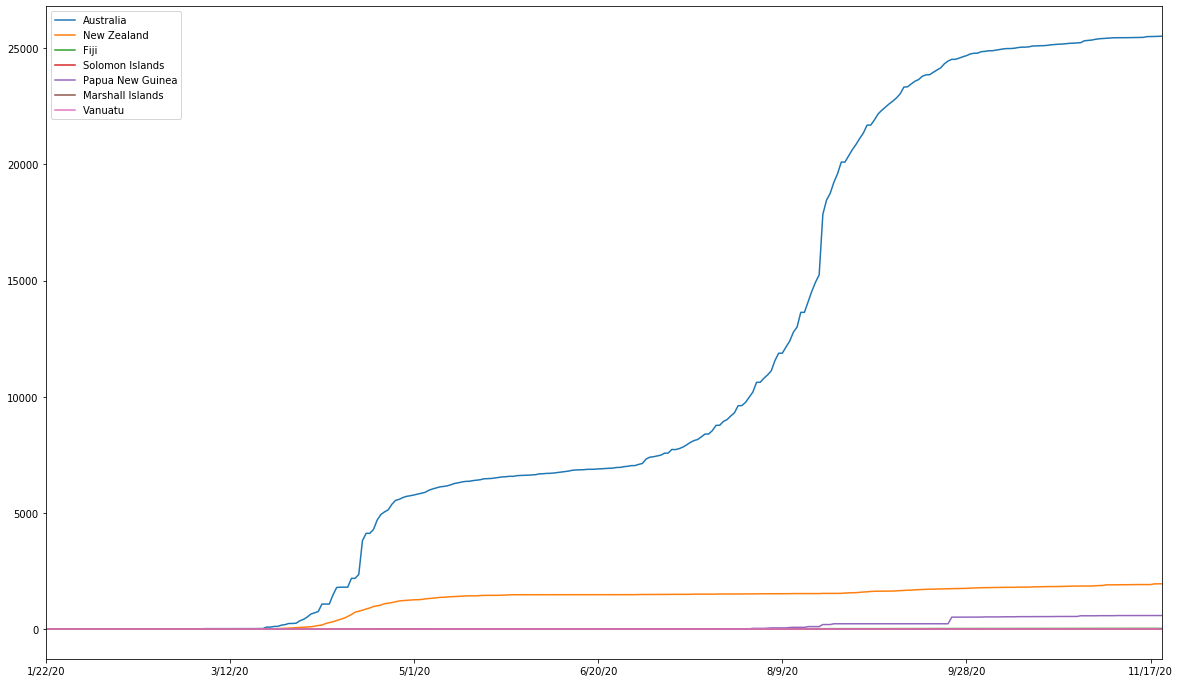

In [130]:
plt.figure(figsize=(20, 12))
recoveries_df_aggregated.loc ["Australia"].plot()
recoveries_df_aggregated.loc ["New Zealand"].plot()
recoveries_df_aggregated.loc ["Fiji"].plot()
recoveries_df_aggregated.loc ["Solomon Islands"].plot()
recoveries_df_aggregated.loc ["Papua New Guinea"].plot()
recoveries_df_aggregated.loc ["Marshall Islands"].plot()
recoveries_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/recoveries-oceania.png')
plt.show()

### Visualizing Oceania deaths cases

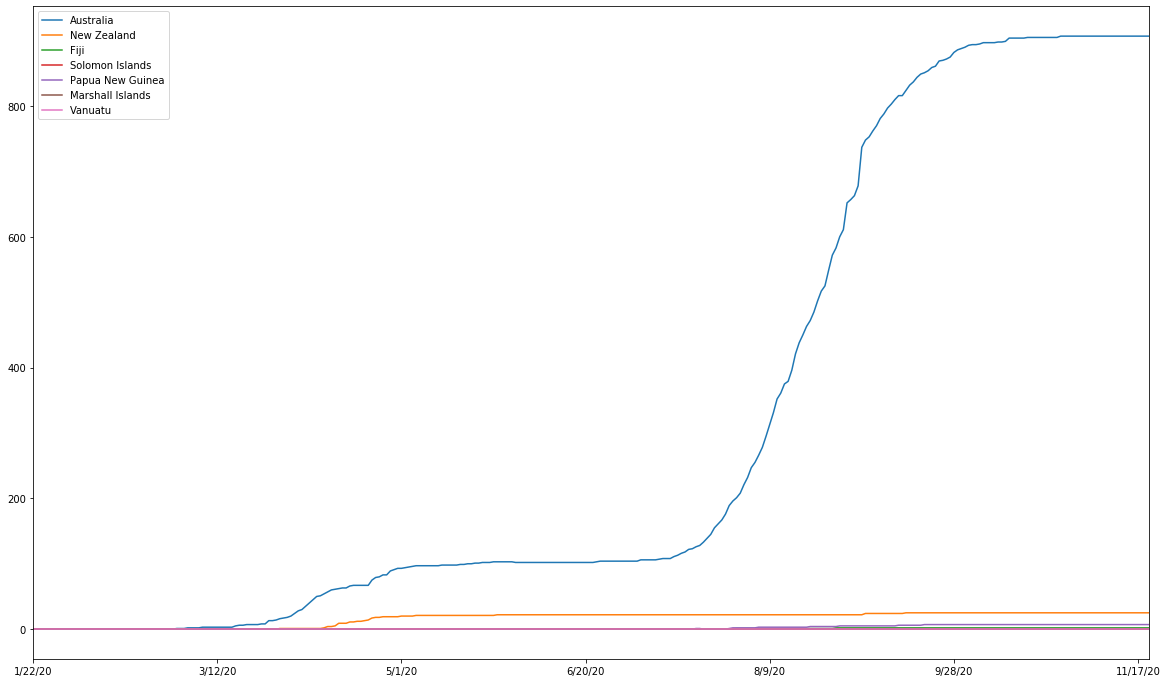

In [131]:
plt.figure(figsize=(20, 12))
deaths_df_aggregated.loc ["Australia"].plot()
deaths_df_aggregated.loc ["New Zealand"].plot()
deaths_df_aggregated.loc ["Fiji"].plot()
deaths_df_aggregated.loc ["Solomon Islands"].plot()
deaths_df_aggregated.loc ["Papua New Guinea"].plot()
deaths_df_aggregated.loc ["Marshall Islands"].plot()
deaths_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/deaths-oceania.png')
plt.show()

### Calculating a good measure describing the spread of the virus 

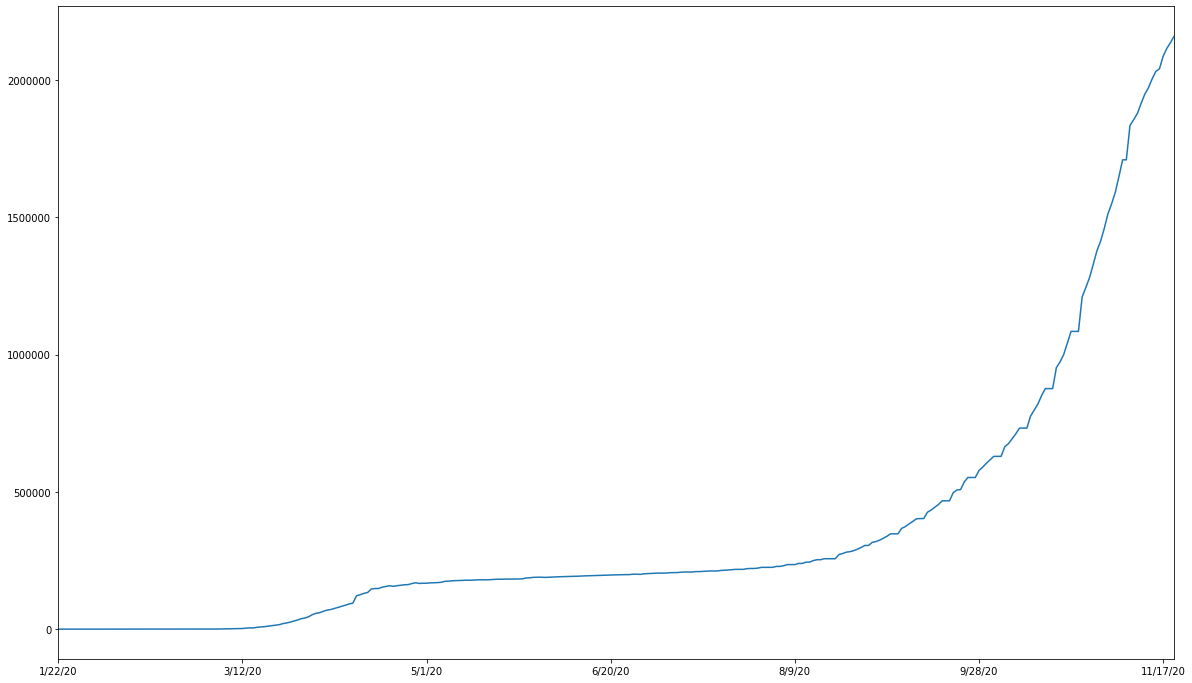

In [132]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['France'].plot()

### Calculating the first derivative of the curve

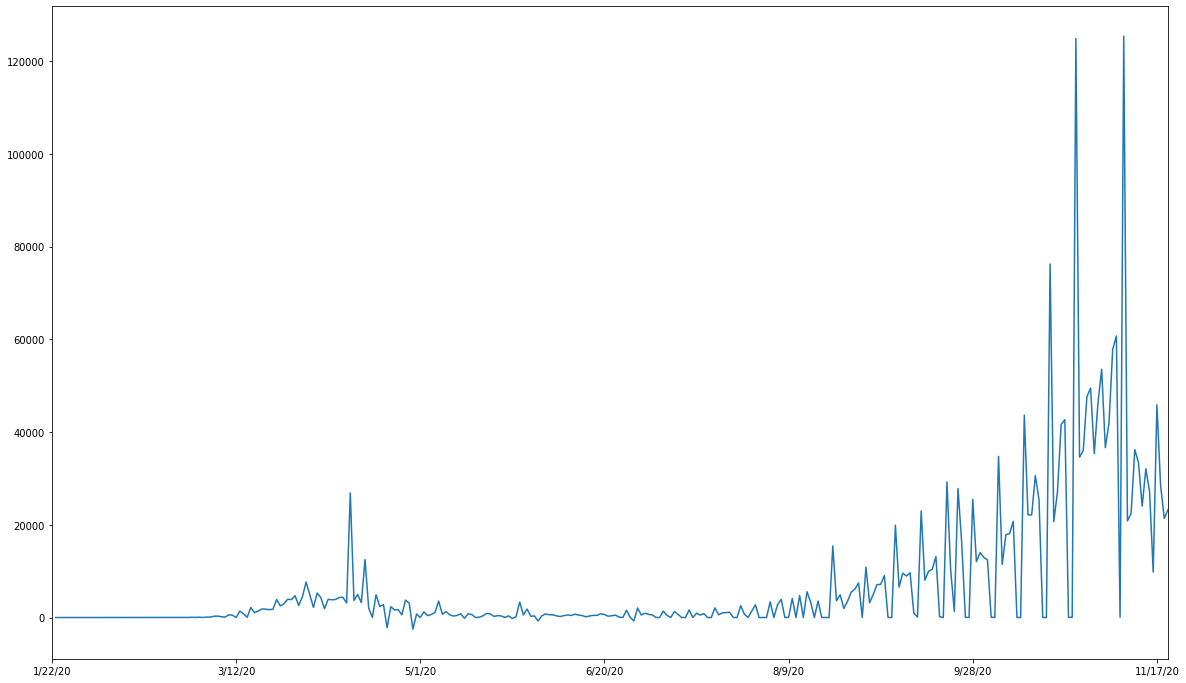

In [133]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['France'].diff().plot()

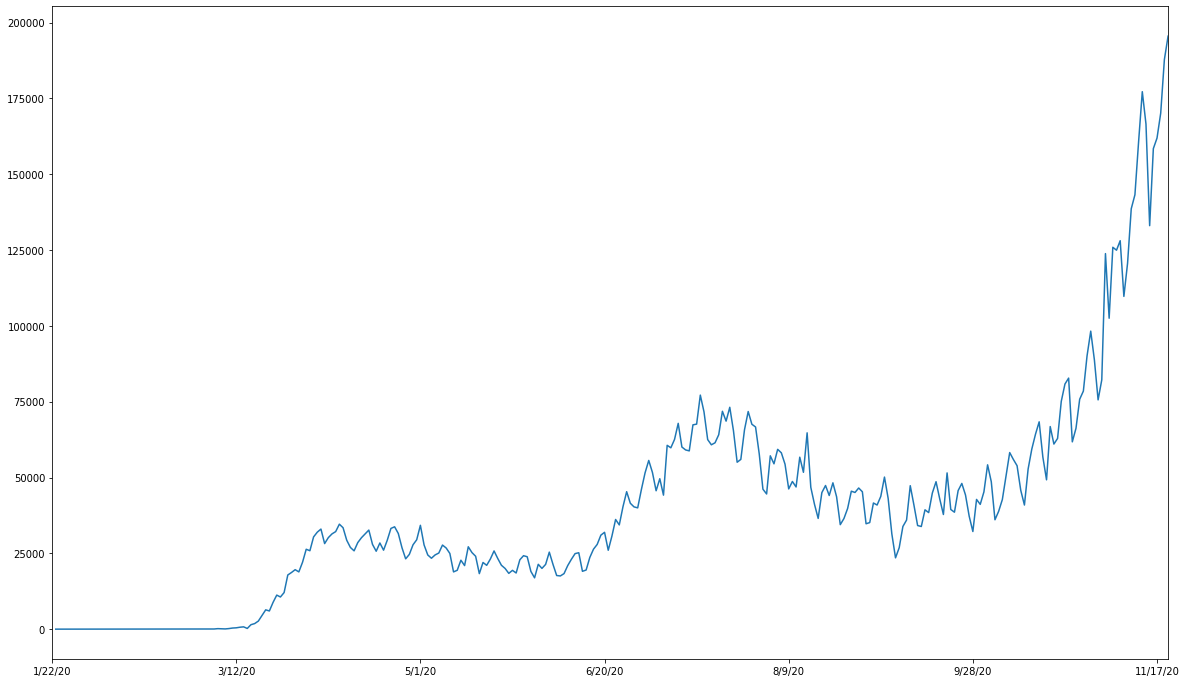

In [134]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['US'].diff().plot()

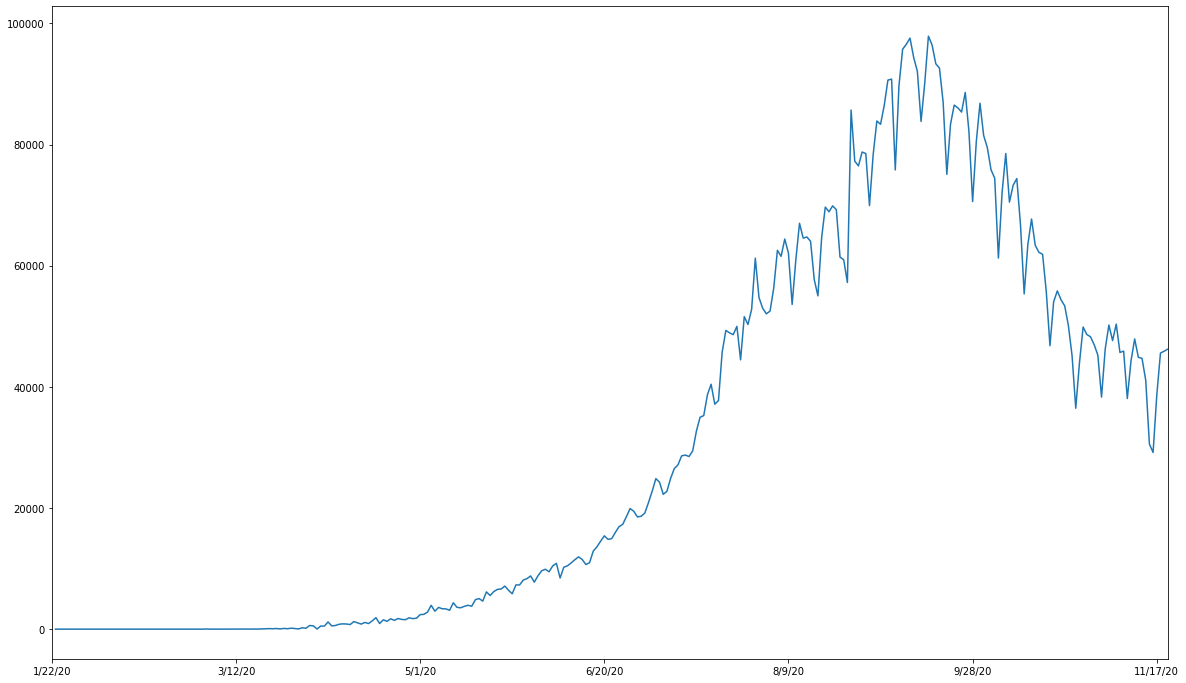

In [135]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['India'].diff().plot()

### Find maximum infection rate for France

In [136]:
confirmed_df_aggregated.loc['France'].diff().max()

125414.0

### Find maximum infection rate for all countries. 

In [137]:
countries = list(confirmed_df_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(confirmed_df_aggregated.loc[c].diff().max())
confirmed_df_aggregated["max_infection_rate"] = max_infection_rates

In [138]:
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42795,42969,43035,43240,43403,43628,43851,44228,44443,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,26211,26701,27233,27830,28432,29126,29837,30623,31459,836.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,65108,65975,66819,67679,68589,69591,70629,71652,72755,1103.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,5616,5725,5725,5872,5914,5951,6018,6066,6142,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,13053,13228,13374,13451,13615,13818,13922,14134,14267,355.0


### Create a new dataframe with maximum infection rate

In [139]:
confirmed_data=pd.DataFrame(confirmed_df_aggregated["max_infection_rate"])

In [140]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=False).head()
max_infection

,max_infection_rate
Country/Region,
US,195542.0
France,125414.0
India,97894.0
Brazil,69074.0
Spain,55019.0


In [141]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=True).tail(20)

In [142]:
fig = px.bar(max_infection, x='max_infection_rate',y=max_infection.index,title='Countries with maximum infection rate', color='max_infection_rate', orientation='h')
fig.write_image("img/Countries-infection-rate.png", width=1960, height=1080)
fig.show()

In [ ]:
(kind='line')